<a href="https://colab.research.google.com/github/SophieShin/DeepLearning/blob/main/%5BGroup7%5D_Code_Demo(ConvNext_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Whole-train 

In [ ]:
# Check the colab gpu version
from IPython.display import HTML
from subprocess import getoutput
s = getoutput('nvidia-smi')
if 'K80' in s:
  gpu = 'K80'
elif 'T4' in s:
  gpu = 'T4'
elif 'P100' in s:
  gpu = 'P100'
display(HTML(f"<h2>{gpu}</h2>"))
print(s)

Sun May 22 10:56:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Clone the official ConvNeXt respository
!git clone https://github.com/facebookresearch/ConvNeXt

Cloning into 'ConvNeXt'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 246 (delta 54), reused 42 (delta 42), pack-reused 162
Receiving objects: 100% (246/246), 71.38 KiB | 11.90 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [ ]:
%cd ConvNeXt

/content/ConvNeXt


In [ ]:
# setup 1
!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 91.9 MB/s eta 0:00:13tcmalloc: large alloc 1147494400 bytes == 0x39d78000 @  0x7f7394428615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████               | 1055.7 MB 1.2 MB/s eta 0:12:26tcmalloc: large alloc 1434370048 bytes == 0x7e3ce000 @  0x7f7394428615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████▋          | 1336.2 MB 1.2 MB/s eta 0:08:51tcmalloc: large alloc 1792966656 bytes 

In [ ]:
#setup2
!pip install timm==0.3.2 tensorboardX six

     |████████████████████████████████| 244 kB 7.6 MB/s 
     |████████████████████████████████| 125 kB 91.9 MB/s 


In [ ]:
# setup 3
!pip install submitit

     |████████████████████████████████| 71 kB 280 kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
#trial 1 -> failed because of large batch size
!python -m torch.distributed.launch --nproc_per_node=1 main.py \
--model convnext_tiny --drop_path 0.1 \
--batch_size 128 --lr 4e-3 --update_freq 4 \
--model_ema true --model_ema_eval true \
--data_path "/content/drive/MyDrive/imagenet_1k" \
--output_dir ./output 

| distributed init (rank 0): env://, gpu 0
Namespace(aa='rand-m9-mstd0.5-inc1', auto_resume=True, batch_size=128, clip_grad=None, color_jitter=0.4, crop_pct=None, cutmix=1.0, cutmix_minmax=None, data_path='/content/drive/MyDrive/imagenet_1k', data_set='IMNET', device='cuda', disable_eval=False, dist_backend='nccl', dist_eval=True, dist_on_itp=False, dist_url='env://', distributed=True, drop_path=0.1, enable_wandb=False, epochs=300, eval=False, eval_data_path=None, finetune='', gpu=0, head_init_scale=1.0, imagenet_default_mean_and_std=True, input_size=224, layer_decay=1.0, layer_scale_init_value=1e-06, local_rank=0, log_dir=None, lr=0.004, min_lr=1e-06, mixup=0.8, mixup_mode='batch', mixup_prob=1.0, mixup_switch_prob=0.5, model='convnext_tiny', model_ema=True, model_ema_decay=0.9999, model_ema_eval=True, model_ema_force_cpu=False, model_key='model|module', model_prefix='', momentum=0.9, nb_classes=1000, num_workers=10, opt='adamw', opt_betas=None, opt_eps=1e-08, output_dir='./output', p

In [ ]:
!python -m torch.distributed.launch --nproc_per_node=1 main.py \
--model convnext_tiny --drop_path 0.1 \
--batch_size 64 --lr 4e-3 --update_freq 4 \
--warmup_epochs 0 --epochs 1 \
--model_ema true --model_ema_eval true \
--data_path "/content/drive/MyDrive/imagenet_1k" \
--output_dir ./output

| distributed init (rank 0): env://, gpu 0
Namespace(aa='rand-m9-mstd0.5-inc1', auto_resume=True, batch_size=64, clip_grad=None, color_jitter=0.4, crop_pct=None, cutmix=1.0, cutmix_minmax=None, data_path='/content/drive/MyDrive/imagenet_1k', data_set='IMNET', device='cuda', disable_eval=False, dist_backend='nccl', dist_eval=True, dist_on_itp=False, dist_url='env://', distributed=True, drop_path=0.1, enable_wandb=False, epochs=1, eval=False, eval_data_path=None, finetune='', gpu=0, head_init_scale=1.0, imagenet_default_mean_and_std=True, input_size=224, layer_decay=1.0, layer_scale_init_value=1e-06, local_rank=0, log_dir=None, lr=0.004, min_lr=1e-06, mixup=0.8, mixup_mode='batch', mixup_prob=1.0, mixup_switch_prob=0.5, model='convnext_tiny', model_ema=True, model_ema_decay=0.9999, model_ema_eval=True, model_ema_force_cpu=False, model_key='model|module', model_prefix='', momentum=0.9, nb_classes=1000, num_workers=10, opt='adamw', opt_betas=None, opt_eps=1e-08, output_dir='./output', pin_

In [ ]:
!zip -r '/content/ConvNeXt/output.zip' '/content/ConvNeXt/output'

  adding: content/ConvNeXt/output/ (stored 0%)
  adding: content/ConvNeXt/output/log.txt (deflated 48%)
  adding: content/ConvNeXt/output/checkpoint-best-ema.pth (deflated 7%)
  adding: content/ConvNeXt/output/checkpoint-0.pth (deflated 7%)
  adding: content/ConvNeXt/output/checkpoint-best.pth (deflated 7%)


In [ ]:
from google.colab import files
files.download('/content/ConvNeXt/output.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Accuracy of the ConvNeXt-T model using CIFAR-10 dataset


In [ ]:
# setup 1
!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
#setup2
!pip install timm==0.3.2 tensorboardX six
# setup 3
!pip install submitit

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.3 MB/s eta 0:15:18tcmalloc: large alloc 1147494400 bytes == 0x39108000 @  0x7f2578b90615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████               | 1055.7 MB 1.2 MB/s eta 0:12:53tcmalloc: large alloc 1434370048 bytes == 0x7d75e000 @  0x7f2578b90615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████▋          | 1336.2 MB 1.2 MB/s eta 0:08:54tcmalloc: large alloc 1792966656 bytes =

In [ ]:
# Download the CIFAR-10 dataset
!git clone https://github.com/YoongiKim/CIFAR-10-images

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 61.32 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Checking out files: 100% (60001/60001), done.


In [ ]:
# Clone the official ConvNeXt respository
!git clone https://github.com/facebookresearch/ConvNeXt

Cloning into 'ConvNeXt'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 246 (delta 54), reused 42 (delta 42), pack-reused 162
Receiving objects: 100% (246/246), 71.38 KiB | 6.49 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [ ]:
# Download the pretrained ConvNext-T model

%cd ConvNeXt
!wget https://dl.fbaipublicfiles.com/convnext/convnext_tiny_1k_224_ema.pth

/content/ConvNeXt
--2022-05-23 13:04:57--  https://dl.fbaipublicfiles.com/convnext/convnext_tiny_1k_224_ema.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114414741 (109M) [binary/octet-stream]
Saving to: ‘convnext_tiny_1k_224_ema.pth’

convnext_tiny_1k_22 100%[===================>] 109.11M  35.3MB/s    in 3.1s    

2022-05-23 13:05:00 (35.3 MB/s) - ‘convnext_tiny_1k_224_ema.pth’ saved [114414741/114414741]



In [ ]:
# Finetuning with CIFAR-10 dataset

!python main.py --epochs 30 \
                --model convnext_tiny \
                --data_set image_folder \
                --data_path ../CIFAR-10-images/train \
                --eval_data_path ../CIFAR-10-images/test \
                --nb_classes 10 \
                --num_workers 8 \
                --warmup_epochs 0 \
                --save_ckpt true \
                --output_dir model_ckpt \
                --finetune convnext_tiny_1k_224_ema.pth \
                --cutmix 0  --mixup 0  \
                --lr 4e-4 \

Not using distributed mode
Namespace(aa='rand-m9-mstd0.5-inc1', auto_resume=True, batch_size=64, clip_grad=None, color_jitter=0.4, crop_pct=None, cutmix=0.0, cutmix_minmax=None, data_path='../CIFAR-10-images/train', data_set='image_folder', device='cuda', disable_eval=False, dist_eval=True, dist_on_itp=False, dist_url='env://', distributed=False, drop_path=0, enable_wandb=False, epochs=30, eval=False, eval_data_path='../CIFAR-10-images/test', finetune='convnext_tiny_1k_224_ema.pth', head_init_scale=1.0, imagenet_default_mean_and_std=True, input_size=224, layer_decay=1.0, layer_scale_init_value=1e-06, local_rank=-1, log_dir=None, lr=0.0004, min_lr=1e-06, mixup=0.0, mixup_mode='batch', mixup_prob=1.0, mixup_switch_prob=0.5, model='convnext_tiny', model_ema=False, model_ema_decay=0.9999, model_ema_eval=False, model_ema_force_cpu=False, model_key='model|module', model_prefix='', momentum=0.9, nb_classes=10, num_workers=8, opt='adamw', opt_betas=None, opt_eps=1e-08, output_dir='model_ckpt',

## Inference for random images


In [ ]:
# Set up
import sys

import matplotlib.pyplot as plt
import PIL
from PIL import Image
import json

import torch
import torchvision
import torchvision.transforms as T

if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install timm==0.5.4 

from timm import create_model

Running in Colab.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 431 kB 8.3 MB/s 


In [ ]:
# pretrained model(ConvNext_XL)

model_name = "convnext_xlarge_in22k"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device = ", device)
# ConvNeXt_XL model : https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/convnext.py
model = create_model(model_name, pretrained=True).to(device)

device =  cuda


Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_xlarge_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_xlarge_22k_224.pth


In [ ]:
# Define transforms for inference
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD

NORMALIZE_MEAN = IMAGENET_DEFAULT_MEAN
NORMALIZE_STD = IMAGENET_DEFAULT_STD
SIZE = 256

# Resize smaller edge to 256, no center cropping
transforms = [
              T.Resize(SIZE, interpolation=T.InterpolationMode.BICUBIC),
              T.ToTensor(),
              T.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
              ]

transforms = T.Compose(transforms)

In [ ]:
# Convert class label number to label(total 21,841 lables)
!wget https://dl.fbaipublicfiles.com/convnext/label_to_words.json
imagenet_labels = json.load(open('label_to_words.json'))

--2022-05-23 22:38:09--  https://dl.fbaipublicfiles.com/convnext/label_to_words.json
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773945 (756K) [application/json]
Saving to: ‘label_to_words.json’

label_to_words.json 100%[===================>] 755.81K  --.-KB/s    in 0.09s   

2022-05-23 22:38:10 (7.94 MB/s) - ‘label_to_words.json’ saved [773945/773945]



--2022-05-23 22:39:07--  https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/MyungRyunDang.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 541300 (529K) [image/jpeg]
Saving to: ‘MyungRyunDang.jpeg.1’

MyungRyunDang.jpeg. 100%[===================>] 528.61K  --.-KB/s    in 0.03s   

2022-05-23 22:39:07 (20.1 MB/s) - ‘MyungRyunDang.jpeg.1’ saved [541300/541300]

ginkgo, gingko, maidenhair tree, Ginkgo biloba 73.69%
chinaberry, chinaberry tree, China tree, Persian lilac, pride-of-India, azederach, azedarach, Melia azederach, Melia azedarach 2.57%
caracolito, Ruptiliocarpon caracolito 1.03%
China tree, false dogwood, jaboncillo, chinaberry, Sapindus saponaria 0.71%
wild China tree, Sapindus drumondii, Sapindus marginatu

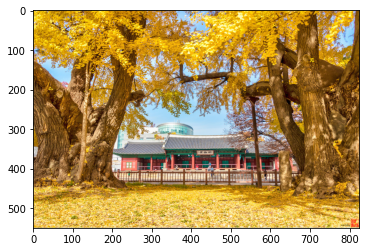

In [ ]:
# inference with a SKKU image

!wget https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/MyungRyunDang.jpeg

img = PIL.Image.open('MyungRyunDang.jpeg')
img_tensor = transforms(img).unsqueeze(0).to(device)
plt.imshow(img)


output = torch.softmax(model(img_tensor), dim=1)
top5 = torch.topk(output, k=5)
top5_prob = top5.values[0]
top5_indices = top5.indices[0]

for i in range(5):
    labels = imagenet_labels[str(int(top5_indices[i]))]
    prob = "{:.2f}%".format(float(top5_prob[i])*100)
    print(labels, prob)

--2022-05-23 22:39:19--  https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/MyunRyunDang2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2215056 (2.1M) [image/jpeg]
Saving to: ‘MyunRyunDang2.jpg’

MyunRyunDang2.jpg   100%[===================>]   2.11M  --.-KB/s    in 0.05s   

2022-05-23 22:39:20 (40.9 MB/s) - ‘MyunRyunDang2.jpg’ saved [2215056/2215056]

memorial, monument 13.90%
pinetum 8.38%
repository, monument 5.88%
California box elder, Acer negundo Californicum 4.51%
statue 3.48%


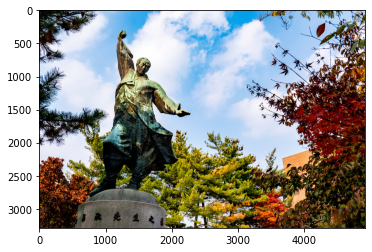

In [ ]:
# inference with a image of the founder of SKKU



!wget https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/MyunRyunDang2.jpg
img = PIL.Image.open('MyunRyunDang2.jpg')

img_tensor = transforms(img).unsqueeze(0).to(device)
plt.imshow(img)

output = torch.softmax(model(img_tensor), dim=1)
top5 = torch.topk(output, k=5)
top5_prob = top5.values[0]
top5_indices = top5.indices[0]

for i in range(5):
    labels = imagenet_labels[str(int(top5_indices[i]))]
    prob = "{:.2f}%".format(float(top5_prob[i])*100)
    print(labels, prob)


--2022-05-23 22:39:31--  https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/Library.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1160828 (1.1M) [image/jpeg]
Saving to: ‘Library.jpg’

Library.jpg         100%[===================>]   1.11M  --.-KB/s    in 0.05s   

2022-05-23 22:39:32 (24.4 MB/s) - ‘Library.jpg’ saved [1160828/1160828]

concrete 8.47%
university 5.38%
college 4.24%
building complex, complex 3.95%
medical building, health facility, healthcare facility 3.14%


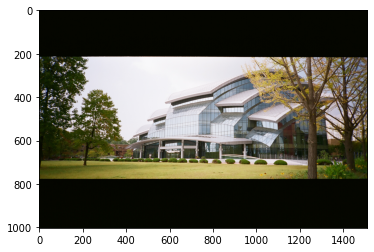

In [ ]:
# inference with a image of the library of SKKU

!wget https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/Library.jpg
img = PIL.Image.open('Library.jpg')

img_tensor = transforms(img).unsqueeze(0).to(device)
plt.imshow(img)

output = torch.softmax(model(img_tensor), dim=1)
top5 = torch.topk(output, k=5)
top5_prob = top5.values[0]
top5_indices = top5.indices[0]

for i in range(5):
    labels = imagenet_labels[str(int(top5_indices[i]))]
    prob = "{:.2f}%".format(float(top5_prob[i])*100)
    print(labels, prob)

--2022-05-23 22:39:37--  https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/Graduation.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2499238 (2.4M) [image/jpeg]
Saving to: ‘Graduation.jpg’

Graduation.jpg      100%[===================>]   2.38M  --.-KB/s    in 0.05s   

2022-05-23 22:39:37 (51.2 MB/s) - ‘Graduation.jpg’ saved [2499238/2499238]

academic costume 83.72%
mortarboard 0.84%
academic gown, academic robe, judge's robe 0.61%
valedictorian, valedictory speaker 0.23%
schoolmate, classmate, schoolfellow, class fellow 0.18%


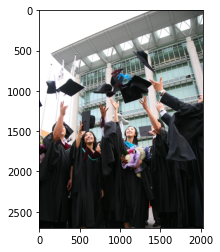

In [ ]:
# inference with a image of the library of SKKU

!wget https://raw.githubusercontent.com/SophieShin/CLA3109_class/main/Inference%20for%20ConvNext/Graduation.jpg
img = PIL.Image.open('Graduation.jpg')

img_tensor = transforms(img).unsqueeze(0).to(device)
plt.imshow(img)

output = torch.softmax(model(img_tensor), dim=1)
top5 = torch.topk(output, k=5)
top5_prob = top5.values[0]
top5_indices = top5.indices[0]

for i in range(5):
    labels = imagenet_labels[str(int(top5_indices[i]))]
    prob = "{:.2f}%".format(float(top5_prob[i])*100)
    print(labels, prob)